#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=7E4456>GRIP - TSF</font></center>

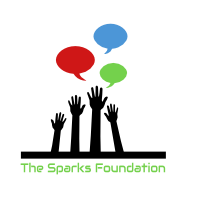

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center><font color=7E4456>Data Science and Business Analytics Internship

### <center><font color=7E4456>By </font><font color=15D77D>: </font><font color=5B1736>Shreeya Ravindra Pant-Paradkar</font></center>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <center><font color=5B4727>Prediction using Decision Tree Algorithm</font></center>
### <center><font color=5B4727>(Level - Intermediate)</font></center>
# <center><font color=14655D>Task 6 : Decision Tree Classifier</font></center>
### <center><font color=155E64>Problem Statement: </font><font color=5B4727>If any new data is fed to this classifier, it should be able to predict the right class accordingly</font>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GitHub: 
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Date: 04-12-20 (Friday)

### 1. Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import warnings
warnings.filterwarnings('ignore')

### 2. Reading Data

In [3]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv('iris.csv', encoding='ISO 8859-1', names=names)

### 3. Data Exploration

In [4]:
df.head() #displays first five records

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info() #preview of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe() #summary of data

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape #shows the amount of data

(150, 5)

In [8]:
df['class'].value_counts() #shows the categories in target vaiables

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [9]:
df.corr() #correlation

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


### 4. EDA

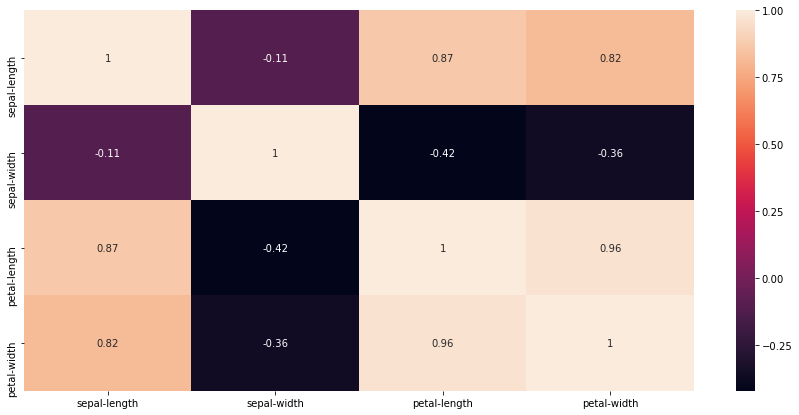

In [10]:
plt.figure(figsize=(15,7)) #heatmap
sns.heatmap(df.corr(),annot=True)

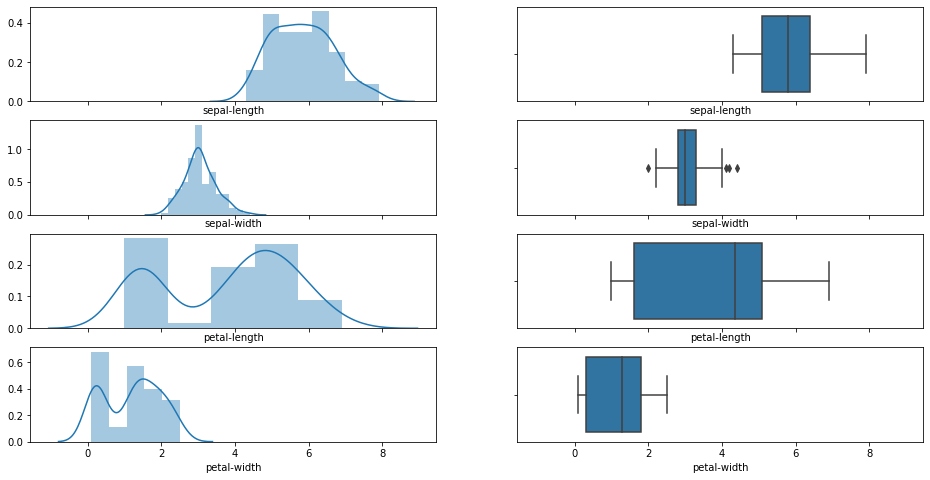

In [11]:
_, ax = plt.subplots(4, 2, sharex=True, figsize=(16, 8))
sns.distplot(df['sepal-length'],ax=ax[0][0])
sns.boxplot(df['sepal-length'],ax=ax[0][1])
sns.distplot(df['sepal-width'],ax=ax[1][0])
sns.boxplot(df['sepal-width'],ax=ax[1][1])
sns.distplot(df['petal-length'],ax=ax[2][0])
sns.boxplot(df['petal-length'],ax=ax[2][1])
sns.distplot(df['petal-width'],ax=ax[3][0])
sns.boxplot(df['petal-width'],ax=ax[3][1])
plt.show()

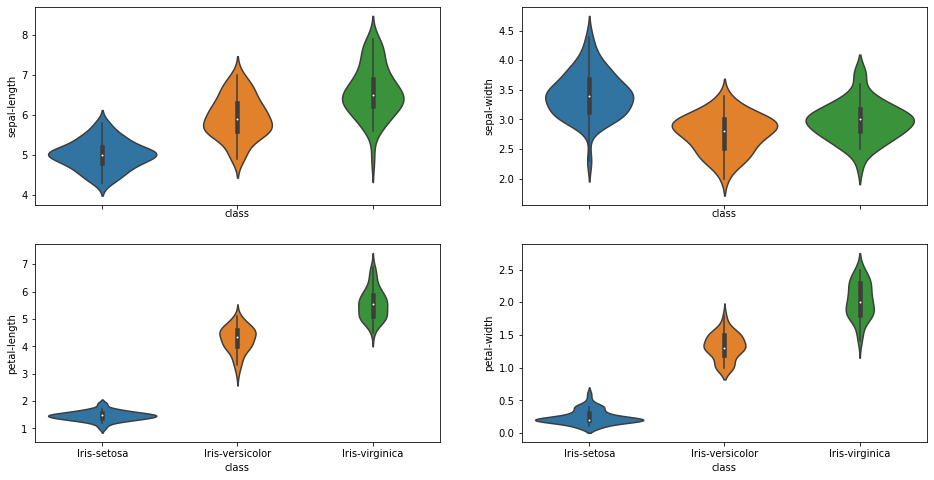

In [12]:
_, ax = plt.subplots(2, 2, sharex=True, figsize=(16, 8))
sns.violinplot(x='class', y='sepal-length', data=df, ax=ax[0,0])
sns.violinplot(x='class', y='sepal-width', data=df, ax=ax[0,1])
sns.violinplot(x='class', y='petal-length', data=df, ax=ax[1,0])
sns.violinplot(x='class', y='petal-width', data=df, ax=ax[1,1])

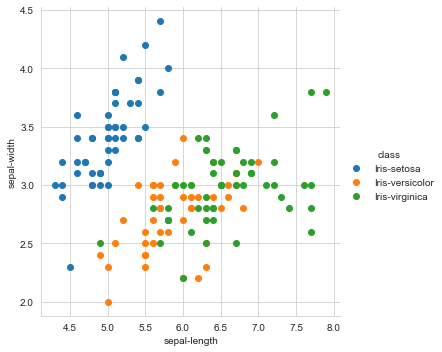

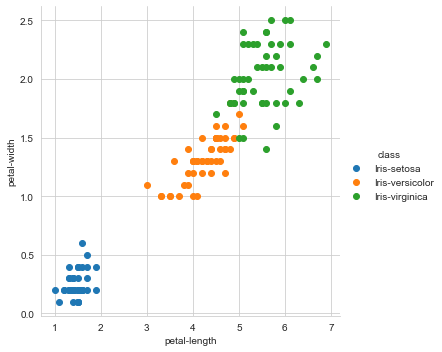

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="class", size=5) \
   .map(plt.scatter, "sepal-length","sepal-width") \
   .add_legend();
plt.show();
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="class", size=5) \
   .map(plt.scatter, "petal-length","petal-width") \
   .add_legend();
plt.show();

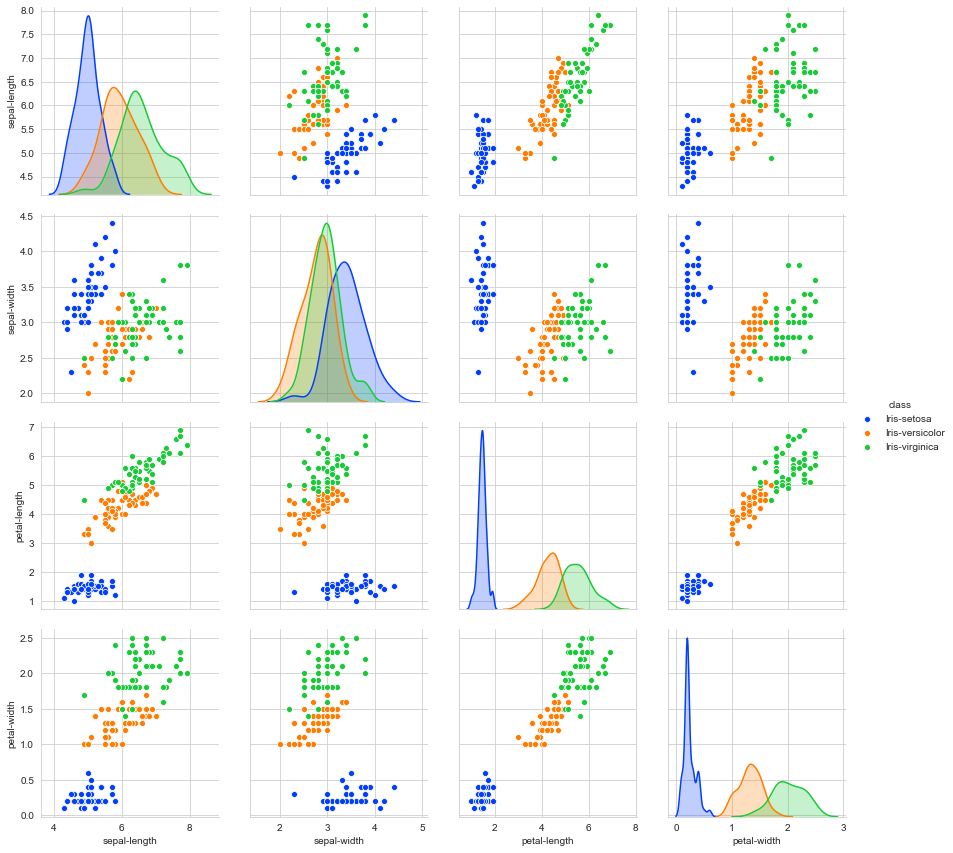

In [14]:
sns.pairplot(df,hue="class",palette="bright",diag_kind="auto",size=3) #to visualise all the attributes dependency on each other
sns.set_style("whitegrid");

It is seen that "iris-setosa" is an independent cluster in every parameter, while the other two species, "iris-versicolor" and "iris-virginica" are overlapping a bit on each other, which shows their dependency on "iris-setosa"

### 5. Data Preparation

In [15]:
X = df.drop('class',axis=1)
y = df['class'].map({'Iris-setosa':0 , 'Iris-versicolor':1, 'Iris-virginica':2 })
y= np.array(y)

In [16]:
X.shape,y.shape

((150, 4), (150,))

### 6. Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [18]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [19]:
X_test.shape, y_test.shape

((30, 4), (30,))

### 7. Model Building

In [20]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
ds_tree=DecisionTreeClassifier(criterion = "entropy")
ds_tree.fit(X_train,y_train)
pred=ds_tree.predict(X_test)

In [21]:
print('accuracy_score: ',accuracy_score(y_test,pred))
print('confusion_matrix:\n',confusion_matrix(y_test,pred))

accuracy_score:  1.0
confusion_matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


### 8. Comparison of actual v/s predicted output

In [22]:
X_test['Expected_outcome']=y_test
X_test['Predicted_outcome']=pred
X_test

,sepal-length,sepal-width,petal-length,petal-width,Expected_outcome,Predicted_outcome
114,5.8,2.8,5.1,2.4,2,2
62,6.0,2.2,4.0,1.0,1,1
33,5.5,4.2,1.4,0.2,0,0
107,7.3,2.9,6.3,1.8,2,2
7,5.0,3.4,1.5,0.2,0,0
100,6.3,3.3,6.0,2.5,2,2
40,5.0,3.5,1.3,0.3,0,0
86,6.7,3.1,4.7,1.5,1,1
76,6.8,2.8,4.8,1.4,1,1
71,6.1,2.8,4.0,1.3,1,1


### 9. Model Evaluation

In [23]:
from sklearn.metrics import classification_report
print("Accuracy of the model is", accuracy_score(pred, y_test))
print('Classification Report\n')
print(classification_report(y_test,pred))

Accuracy of the model is 1.0
Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 10. Decision Tree

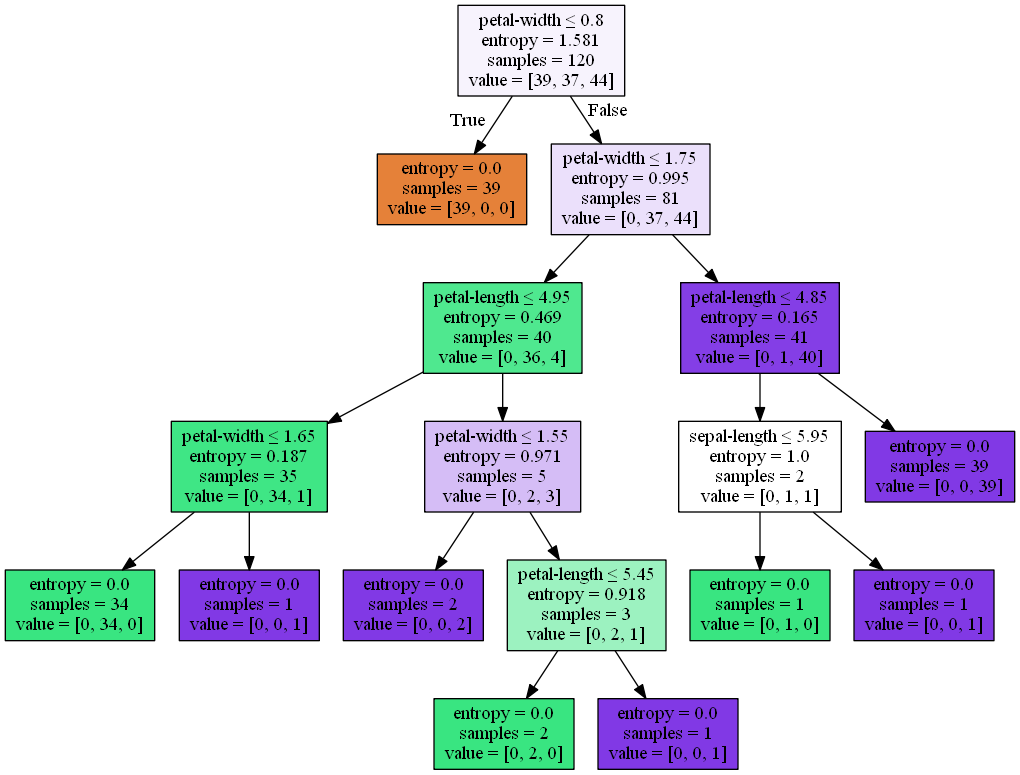

In [24]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
from pydot import graph_from_dot_data
from six import StringIO  

names1 = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

dot_data = StringIO()
export_graphviz(ds_tree, out_file=dot_data, feature_names=names1, filled=True, rounded=False,special_characters=True)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 11. Conclusion
##### I have successfully predicted the right classes accordingly when new data was fed to the model using Supervised ML Algorithm Decision Tree Classifier.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=5B1736>Thank You!</font></center>